# 1. Preliminaires

## 1.1 Import

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import label_binarize

## 1.2 Data

In [2]:
data = pd.read_csv("data/cleaned/data_cleaned.csv", sep = ',')
data.head()

,id,target,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# 2. Préparation des données
## 2.1 X et y

In [3]:
X = data.drop(columns="target")
y = data["target"]

In [4]:
X.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [5]:
y.head()

0     3
1    49
2    65
3    94
4    84
Name: target, dtype: int64

## 2.2 Test Train Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=data["target"])

In [9]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (693, 193) et y_train de forme (693,) 
Nous avons X_test de forme (297, 193) et y_test de forme (297,) 


In [13]:
y_train.value_counts(normalize=True).round(2)

target
86    0.01
96    0.01
26    0.01
70    0.01
40    0.01
      ... 
73    0.01
67    0.01
58    0.01
6     0.01
20    0.01
Name: proportion, Length: 99, dtype: float64

In [14]:
y_test.value_counts(normalize=True).round(2)

target
39    0.01
49    0.01
93    0.01
85    0.01
19    0.01
      ... 
32    0.01
61    0.01
20    0.01
13    0.01
56    0.01
Name: proportion, Length: 99, dtype: float64

# 3. Modélisation
## 3.1 Baseline avec le K-NN

In [15]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = estimator.predict(X_test)
y_pred

array([ 5, 22,  6, 28, 32, 12,  0, 31, 19,  0,  3,  8, 16, 33,  3, 41,  8,
       15, 23, 40, 28,  2, 28,  0, 26, 27,  7, 54, 23, 14, 10,  0,  6,  4,
       14, 43, 16,  6, 18,  3, 16, 37, 17, 11, 21, 22,  0,  9,  6,  0, 18,
       23, 21, 24,  8, 10, 24,  2, 13,  2,  5,  7,  1, 14,  2,  2,  5, 21,
        1, 16,  1, 15,  7,  3, 33, 13,  1, 20,  0,  4, 13,  9, 32, 28, 22,
        1, 31, 23, 11,  0,  9,  0,  7, 33, 20, 20, 24,  8, 32, 28, 17, 11,
        0,  0,  3, 30, 15,  3,  0, 12,  2, 24, 22, 19, 38,  9, 24, 19, 18,
        0,  3,  3, 65, 14,  0,  2, 14,  5,  4,  7,  0,  2, 21, 22, 23, 12,
        7, 25,  8, 28, 15,  6,  4,  3, 28, 56, 11,  5, 74, 10, 16, 15, 11,
        7,  4, 53,  0, 26, 13,  6, 15, 14,  6, 15,  4, 26,  1, 15,  0, 24,
       23, 31, 10,  6,  5, 18,  1, 23,  4, 12, 24,  0, 16,  4,  6, 10, 19,
       10, 11,  4,  0, 24, 14, 12, 17, 31,  7,  0, 13, 24,  2,  2,  3, 31,
        8,  0,  9,  7, 19, 74, 30,  0,  3, 30,  0, 42, 68, 42,  7,  3,  8,
        5,  0, 20,  6,  2

In [17]:
pd.Series(y_pred).value_counts()

0     25
3     20
6     15
7     14
2     13
5     11
1     11
8     10
16    10
24    10
14     9
13     9
15     9
4      9
19     8
11     8
23     8
10     7
28     7
22     6
12     6
31     5
18     5
30     5
17     5
21     5
9      5
20     4
27     3
42     3
26     3
25     3
33     3
32     3
38     2
54     2
47     2
74     2
48     1
70     1
29     1
68     1
43     1
53     1
56     1
65     1
37     1
40     1
41     1
45     1
Name: count, dtype: int64

In [18]:
y_test.value_counts(normalize=True)

target
39    0.010101
49    0.010101
93    0.010101
85    0.010101
19    0.010101
        ...   
32    0.010101
61    0.010101
20    0.010101
13    0.010101
56    0.010101
Name: proportion, Length: 99, dtype: float64

In [19]:
y_test.values

array([39, 66, 60, 70, 98,  5, 69, 90, 72, 92, 91, 54, 50, 87, 77, 97, 88,
       17, 69, 22, 31, 57, 55,  8, 57, 96, 38, 82,  7, 13, 38, 20, 61, 32,
        8,  2, 74, 23, 60, 71, 84, 98, 12, 40, 51, 77, 44, 37, 73, 80,  4,
       87, 25, 75, 10, 80, 67,  1, 31, 83,  8, 89, 90, 72, 46, 35, 47, 36,
       38, 18, 42, 57, 96, 33, 27, 32, 33, 12, 51,  5,  4, 29, 97, 92, 91,
       53, 74, 24, 30, 86, 52, 76,  7, 64, 16, 21, 44, 89, 11, 19, 40, 10,
       85, 25, 93, 75, 59, 49, 18, 67, 53, 13, 72, 29, 17,  9, 18,  6, 76,
       46, 65, 27, 54,  4, 59, 25, 45, 12, 30, 93, 40, 70, 81, 70, 61, 22,
       68, 35, 41, 60, 58, 75, 15, 30, 63, 62, 26,  9, 48, 59, 58, 19,  5,
       26, 92, 42, 80, 89, 43,  3, 24, 78, 83, 94, 39, 71,  3, 22, 45, 43,
       49,  0, 93, 44, 63, 34, 52, 65, 84, 41, 45, 85,  9, 79, 83, 33, 64,
       65, 78, 34, 35, 61, 48, 79, 55, 98, 10, 88, 68, 28, 47, 26, 84, 91,
        6, 11, 48, 88, 78, 82, 67, 69, 95, 29,  2, 73, 94, 24, 82, 19, 64,
       68, 23, 81, 66, 62

In [73]:
def score(estimator):
    accurancy = accuracy_score(y_pred= y_pred, y_true=y_test)
    print(f"L'accurancy est : {accurancy}")
    #y_pred_prob = estimator.predict_proba(X_test)

    #logloss = log_loss(y_test, y_pred_prob)
    #print("Log Loss:", logloss)
    
    #y_true_bin = label_binarize(y_test, classes=data["target"].unique())
    #y_pred_prob = estimator.predict_proba(X_test)

    #roc_auc = roc_auc_score(y_true_bin, y_pred_prob, multi_class='ovr')
    #print("ROC AUC Score:", roc_auc)
    

In [49]:
def matrix(y_test, y_pred):    
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Afficher uniquement les erreurs principales
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=False, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix (Simplified)')
    plt.show()


L'accurancy est : 0.006734006734006734
Log Loss: 34.5364318362657
ROC AUC Score: 0.4933976957786482


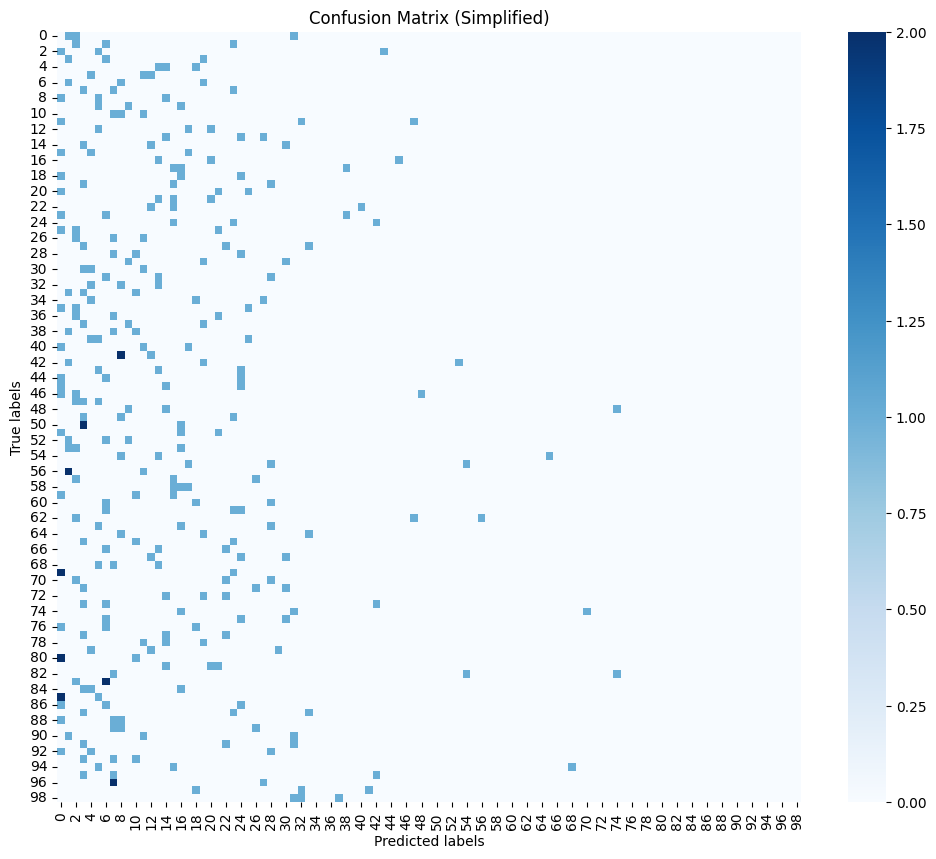

In [61]:
score(estimator)
matrix(y_test, y_pred)

Le modèle n'a pas du tout de précision avec un score d'accurancy proche de 0.

## 3.2 SVM

In [62]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [64]:
y_pred = svm.predict(X_test)
y_pred

array([39, 77, 60, 70, 98, 35, 83, 90, 72, 92, 91, 54, 83, 87, 77, 97, 57,
        7, 90, 22, 39, 44, 55,  8, 57, 96, 38, 82,  7, 13, 38, 20, 61, 32,
        8,  2, 74, 23, 60, 71, 84, 98, 12, 33, 51, 77, 44, 37, 73, 80,  4,
       87, 25, 75, 10, 82, 67,  1, 45, 83,  8, 89, 90, 72, 46, 35, 47, 36,
       37, 18, 42, 57, 96, 33, 27, 32, 33, 12, 51,  5,  4, 37, 97, 92, 91,
       53, 74, 24, 21, 86, 52, 76,  7, 64, 16, 21, 44, 89, 14, 19, 40, 10,
       85, 25, 93, 75, 59, 49, 97, 67, 53, 13, 72, 29, 44,  9, 18,  6, 76,
       74, 65, 27, 54,  4, 59, 25, 33, 12, 30, 93, 40, 70, 81, 70, 61, 22,
       68, 35, 41, 60, 58, 75, 15, 30, 63, 62,  7,  9, 48, 59, 44, 13,  5,
       85, 92, 42, 82, 89, 43,  3, 24, 78, 83, 94, 40, 71,  3, 22, 45, 43,
        7,  0, 93, 44, 63, 30, 52, 65, 84, 12, 45, 76,  9, 79, 83, 33, 64,
       65, 78, 40, 35, 61, 48, 79, 55, 98,  0, 88, 68, 15, 48, 71, 84, 91,
        6, 11,  1, 88, 78, 82, 67, 52, 95, 29,  2, 68, 94, 24, 82, 19, 64,
       30, 23, 52, 66, 62

L'accurancy est : 0.8316498316498316


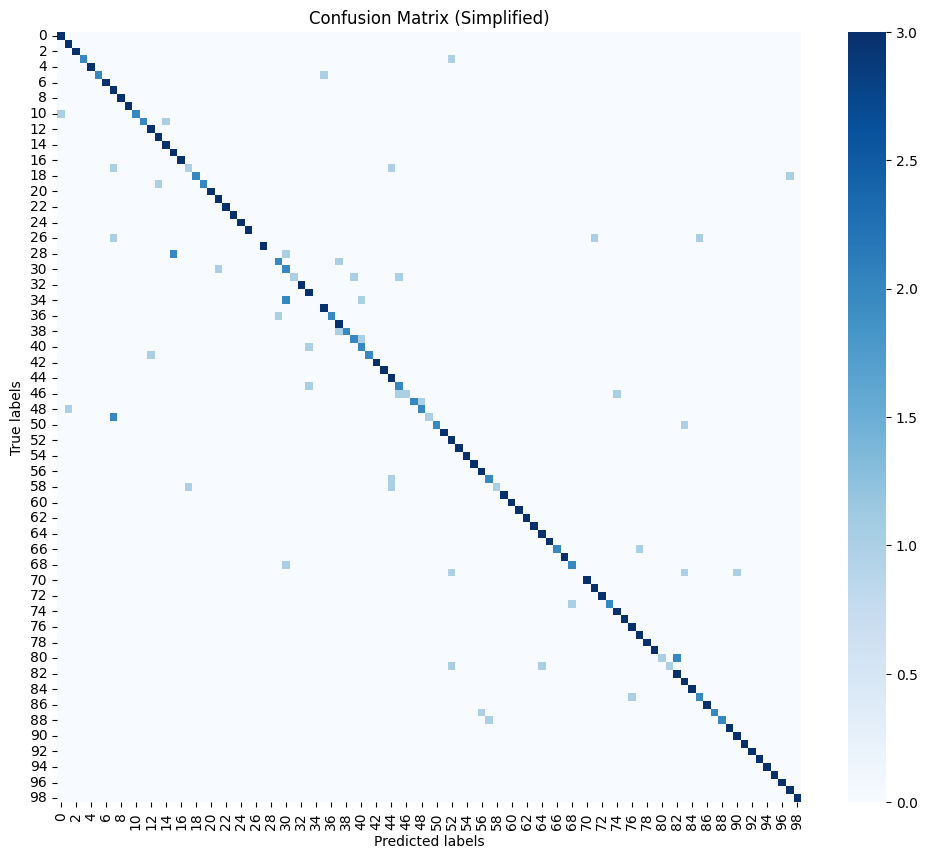

In [74]:
score(svm)
matrix(y_test, y_pred)

Dans un premier temps nous observons que d'utiliser le SVM multiclasse est bien plus efficace que l'utilisation du modèle de k-NN.

## 3.2 Trouver les hyper-paramètres

In [76]:
svm = LinearSVC()

params = { 'C': np.logspace(-5, 5, 20),
          'penalty': ['l1', 'l2'],
          'loss': ['hinge', 'squared_hinge']
        }

In [80]:
grid = GridSearchCV(svm,
                    params,
                    cv=5,
                    return_train_score=True,
                    verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [81]:
best_params = grid.best_params_
best_params

{'C': 100000.0, 'loss': 'squared_hinge', 'penalty': 'l1'}

In [82]:
res = grid.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002000,0.000633,0.000000,0.000000,0.000010,hinge,l1,"{'C': 1e-05, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.068317,0.000681,0.002002,0.000002,0.000010,hinge,l2,"{'C': 1e-05, 'loss': 'hinge', 'penalty': 'l2'}",0.007194,0.007194,...,0.007215,0.000026,48,0.010830,0.010830,0.010830,0.010811,0.010811,0.010823,0.000010
2,0.116912,0.007108,0.001903,0.000197,0.000010,squared_hinge,l1,"{'C': 1e-05, 'loss': 'squared_hinge', 'penalty...",0.007194,0.007194,...,0.007215,0.000026,48,0.010830,0.010830,0.010830,0.010811,0.010811,0.010823,0.000010
3,0.087202,0.000594,0.001103,0.000489,0.000010,squared_hinge,l2,"{'C': 1e-05, 'loss': 'squared_hinge', 'penalty...",0.007194,0.007194,...,0.007215,0.000026,48,0.010830,0.010830,0.010830,0.012613,0.010811,0.011183,0.000715
4,0.001201,0.000399,0.000000,0.000000,0.000034,hinge,l1,"{'C': 3.359818286283781e-05, 'loss': 'hinge', ...",NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.636797,0.006068,0.001703,0.000602,29763.514416,squared_hinge,l2,"{'C': 29763.51441631313, 'loss': 'squared_hing...",0.899281,0.892086,...,0.899009,0.011029,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
76,0.001501,0.000448,0.000000,0.000000,100000.000000,hinge,l1,"{'C': 100000.0, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,3.299782,1.106715,0.002001,0.000001,100000.000000,hinge,l2,"{'C': 100000.0, 'loss': 'hinge', 'penalty': 'l2'}",0.007194,0.007194,...,0.011542,0.005758,38,0.025271,0.030686,0.027076,0.032432,0.023423,0.027778,0.003342
78,6.233458,0.243162,0.001604,0.000492,100000.000000,squared_hinge,l1,"{'C': 100000.0, 'loss': 'squared_hinge', 'pena...",0.928058,0.935252,...,0.933636,0.005227,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [83]:
def resultize(grid):
    """Affichage d'un tableau de résultat plus lisible"""
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [ i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    
    return res

In [84]:
resultize(grid).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
78,6.233458,0.243162,0.001604,0.000492,100000.000000,squared_hinge,l1,"{'C': 100000.0, 'loss': 'squared_hinge', 'pena...",0.933636,0.005227,1,1.00000,0.000000
70,5.404094,0.142954,0.001601,0.000490,8858.667904,squared_hinge,l1,"{'C': 8858.667904100832, 'loss': 'squared_hing...",0.929288,0.002991,2,1.00000,0.000000
66,4.486502,0.035103,0.001403,0.000490,2636.650899,squared_hinge,l1,"{'C': 2636.6508987303555, 'loss': 'squared_hin...",0.926400,0.017937,3,1.00000,0.000000
74,6.046283,0.157816,0.001202,0.000399,29763.514416,squared_hinge,l1,"{'C': 29763.51441631313, 'loss': 'squared_hing...",0.923480,0.026188,4,1.00000,0.000000
55,0.628539,0.009374,0.001800,0.000400,69.519280,squared_hinge,l2,"{'C': 69.51927961775606, 'loss': 'squared_hing...",0.907674,0.009315,5,1.00000,0.000000
59,0.634438,0.006396,0.001801,0.000399,233.572147,squared_hinge,l2,"{'C': 233.57214690901213, 'loss': 'squared_hin...",0.907663,0.016020,6,1.00000,0.000000
63,0.636823,0.004929,0.001601,0.000489,784.759970,squared_hinge,l2,"{'C': 784.7599703514607, 'loss': 'squared_hing...",0.906225,0.019338,7,1.00000,0.000000
62,3.394573,0.059787,0.001603,0.000490,784.759970,squared_hinge,l1,"{'C': 784.7599703514607, 'loss': 'squared_hing...",0.903347,0.013168,8,1.00000,0.000000
71,0.639536,0.007125,0.001402,0.000489,8858.667904,squared_hinge,l2,"{'C': 8858.667904100832, 'loss': 'squared_hing...",0.901877,0.009779,9,0.99964,0.000721
75,0.636797,0.006068,0.001703,0.000602,29763.514416,squared_hinge,l2,"{'C': 29763.51441631313, 'loss': 'squared_hing...",0.899009,0.011029,10,1.00000,0.000000


In [91]:
svm = LinearSVC(penalty="l1", C=100000, loss="squared_hinge")
svm.fit(X_train, y_train)

c:\Users\Coralie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100000, penalty='l1')

In [92]:
y_pred = svm.predict(X_test)
y_pred

array([39, 66, 60, 70, 98, 59, 73, 90, 72, 92, 91, 85, 50, 87, 77, 97, 50,
       17, 69, 67, 31, 57, 55,  8, 57, 96, 38, 82,  7, 13, 38, 20, 61, 31,
        8,  2, 74, 23, 60, 71, 84, 98, 41, 40, 51, 77, 44, 37, 73, 80,  4,
       87, 25, 75, 10, 80, 67,  1, 31, 83,  8, 89, 90, 72, 46, 35, 47, 36,
       38, 18, 42, 57, 96, 33, 27, 32, 33, 12, 51,  5,  4, 29, 97, 92, 91,
       53, 74, 24, 67, 86, 52, 76,  7, 64, 16, 21, 44, 38, 11, 47, 40, 10,
       85, 25, 93, 75, 59, 49, 18, 67, 53, 13, 72, 29, 17,  9, 18,  6, 76,
       46, 65, 27, 54,  4, 59, 25, 45, 12, 30, 93, 40, 70, 27, 70, 61, 22,
       68, 35, 41, 18, 58, 75, 15, 30, 63, 62, 26,  9, 48, 59, 58, 19,  5,
       26, 92, 42, 59, 89, 43,  3, 24, 78, 83, 94, 39, 80,  3, 22, 45, 96,
       49,  0, 93, 44, 82, 34, 52, 70, 84, 41, 45, 76,  9, 79, 83, 33, 64,
       65, 78, 34, 35, 61, 48, 79, 55, 98, 10, 88, 68, 39, 47, 26, 84, 91,
        6, 11, 47, 88, 78, 82, 67, 69, 95, 29,  2, 73, 94, 24, 82, 19, 64,
       68, 23, 81, 66, 62

L'accurancy est : 0.9292929292929293


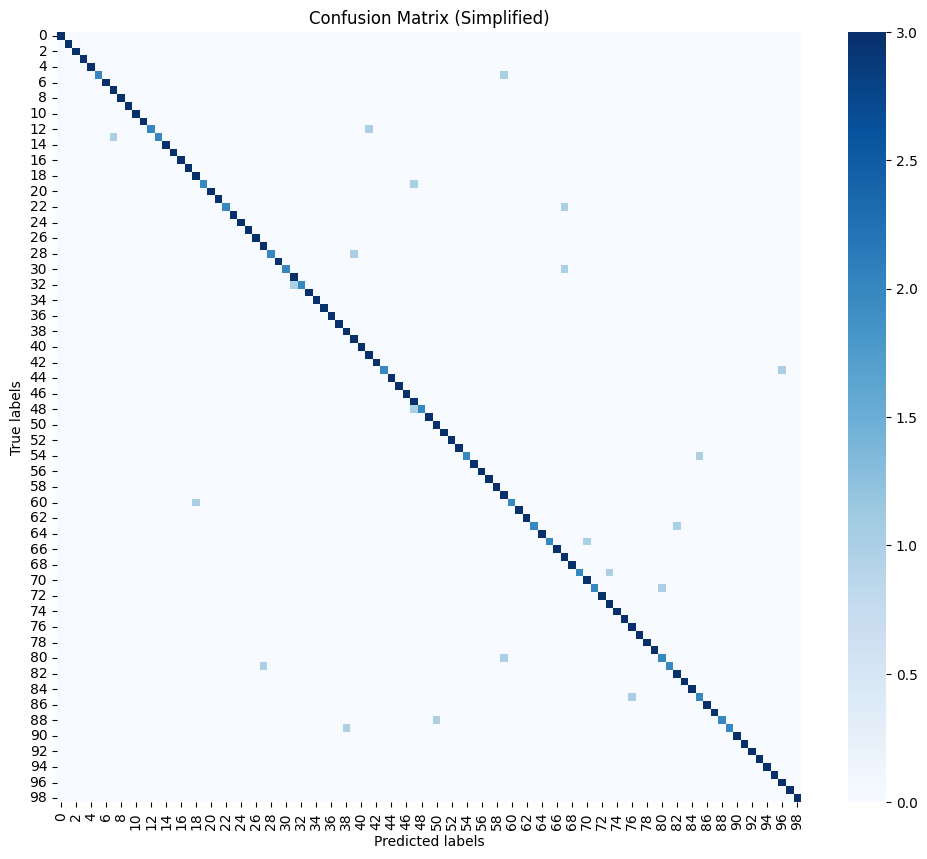

In [93]:
score(svm)
matrix(y_test, y_pred)

Le score d'accurancy est passé de 0.83 à 0.93 soit une réduction de près de 59% du taux d'erreur en optimisant les hyper-paramètre.